In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score
import sklearn.metrics as m

In [2]:
## parametros
model_name='VGG13'

base_folder = 'data'

training_mode, best_epoch = ("majority",80)
# training_mode, best_epoch = ("probability",78)
# training_mode, best_epoch = ("crossentropy",98)
# training_mode, best_epoch = ("multi_target",89)

In [3]:
## folders tests
output_test_path   = os.path.join(base_folder, R'tests')
output_test_folder = os.path.join(output_test_path, model_name + '_' + training_mode)

if not os.path.exists(output_test_folder):
    os.makedirs(output_test_folder)

In [4]:
emotion_table = {'neutral'  : 0, 
                 'happiness': 1, 
                 'surprise' : 2, 
                 'sadness'  : 3, 
                 'anger'    : 4, 
                 'disgust'  : 5, 
                 'fear'     : 6, 
                 'contempt' : 7}

emotion_labels = sorted(emotion_table, key=emotion_table.get)
emotion_labels = sorted(emotion_table, key=emotion_table.get)


num_classes = len(emotion_table)

In [5]:
print(os.path.join(output_test_folder, "test_{}.npz".format(best_epoch)))
data = np.load(os.path.join(output_test_folder, "test_{}.npz".format(best_epoch)))
y_pred = data['y_pred']
y_true = data['y_true']

data/tests/VGG13_majority/test_80.npz


In [6]:
y_true

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_pred

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
m.accuracy_score(y_true, y_pred)

0.8575071724577622

In [9]:
print(m.classification_report(y_true, y_pred, target_names=emotion_labels))

              precision    recall  f1-score   support

     neutral       0.84      0.91      0.87      1083
   happiness       0.93      0.94      0.93       892
    surprise       0.85      0.88      0.87       394
     sadness       0.78      0.67      0.72       382
       anger       0.81      0.83      0.82       269
     disgust       0.50      0.25      0.33        16
        fear       0.76      0.43      0.55        86
    contempt       0.50      0.07      0.12        15

   micro avg       0.86      0.86      0.86      3137
   macro avg       0.75      0.62      0.65      3137
weighted avg       0.85      0.86      0.85      3137
 samples avg       0.86      0.86      0.86      3137



In [10]:
m.cohen_kappa_score(y_true.argmax(axis=1), y_pred.argmax(axis=1), labels=sorted(emotion_table.values()))

0.8108128345795702

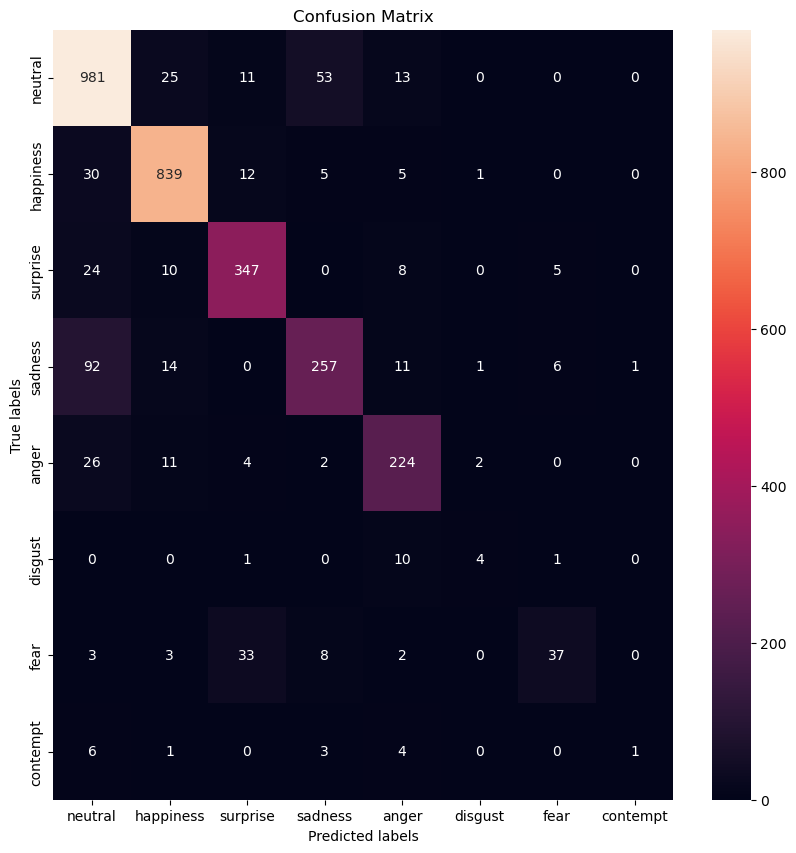

In [17]:
# ax= plt.subplot()

fig, ax = plt.subplots(figsize=(10, 10))

cm = m.confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(emotion_labels)
ax.yaxis.set_ticklabels(emotion_labels)

plt.show()